# Predict Outbursts for Sources without Established Spin or Orbital Periods
- for now, just those with strong signals/phase-folds since also extrapolating for several months
# 119 and 96 are the trustworthy ones

In [1]:
from uncertainties import ufloat
from uncertainties.umath import *
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.stats import LombScargle
from scipy import signal
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import scipy.optimize
import glob
from astropy.table import Table,join,vstack,unique
from importlib import reload
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sb
import scipy.stats as st
import wotan

import ogle as o #module

blue = 'cornflowerblue'
navy = 'navy'
purple = 'rebeccapurple'
pink = '#CF6275'
maroon = 'maroon'

In [2]:
cross = Table.read('sourcefiles.csv')
cross2 = Table.read('part2files.csv')

full = Table.read('smc_x_m03_zar_match_OGLE_v2.ascii',format='ascii')
summ = pd.read_csv('summtab.csv')

cross2 = join(cross2,full,keys='src_n')

In [3]:
def find_next(iband,pd,peak,today=9235):
    '''Find next outburst given period and peak in phase'''
    #calculate phase today
    pt = (today%pd)/pd
    print(f'phase today: {pt}')
    #difference between peak and phase today
    if pt>peak: #if current phase less than 1 but more than peak
        diff = 1-(pt) + peak
    else: #before peak in phase
        diff = peak - pt
    print(f'phase until peak: {diff}')
    #calculate difference in days
    dd = diff*pd
    print(f'days until peak: {dd}')
    return dd

# Source #67


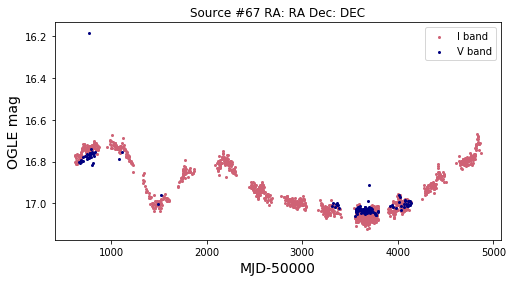

In [5]:
iband,vband = o.getIV(67,cross2,stack=True,plot=True,mlist=['OII I','OIII I','OIV I'])

In [6]:
o.splinedetrend(iband,window=100)

102.96837062281693


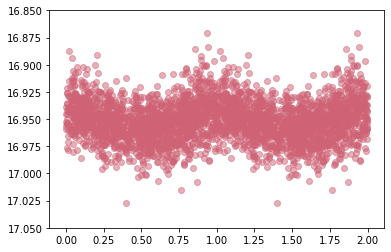

In [9]:
#phase-fold with best period
bp = o.periodogram(iband,minp=5,maxp=200,plot=False,det=True)
plt.scatter((iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
plt.scatter(1+(iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
plt.ylim(17.05,16.85)
print(bp)

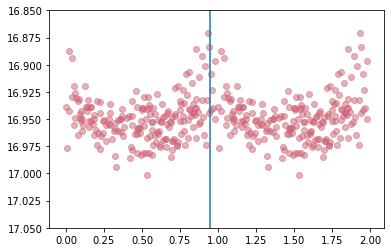

In [12]:
#recent fold
st = -200
end = -1
plt.scatter((iband['MJD-50000'][st:end]%bp)/bp,iband['I detrend'][st:end],color=pink,alpha=0.5)
plt.scatter(1+(iband['MJD-50000'][st:end]%bp)/bp,iband['I detrend'][st:end],color=pink,alpha=0.5)
plt.ylim(17.05,16.85)
plt.axvline(0.95)

In [13]:
def recent_fold(iband,bp,st=-200,end=-1,ylim=.01):
    rec = iband[st:end]
    plt.scatter((rec['MJD-50000']%bp)/bp,rec['I detrend'],color=pink,alpha=0.5)
    plt.scatter(1+(rec['MJD-50000']%bp)/bp,rec['I detrend'],color=pink,alpha=0.5)
    maxi,mini = np.max(rec['I detrend']),np.min(rec['I detrend'])
    plt.ylim(maxi+ylim,mini-ylim)

In [14]:
#didn't go quite to peak
find_next(iband,bp,0.95)

phase today: 0.6877356040593774
phase until peak: 0.26226439594062256
days until peak: 27.00493752238323


<Quantity 27.00493752>

### figure out if this period is an alias of a non-radial pulsation

1.007038354087805


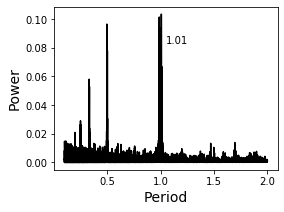

In [18]:
freq,power,bp = o.periodogram(iband,det=True,minp=0.1,maxp=2,more=True)
pf = o.findpeaks(freq,power,pkorder=True)
print(bp)

In [19]:
o.aliasarr([1.007038354087805],nrange=1,cutzero=True)

array([[143.07867174],
       [  0.50175342]])

In [20]:
o.aliasarr(pf['period'][:5]) #first is close to best period

array([[102.85992158, 143.07867174, 102.94541187,  80.34268575,
          1.00702265],
       [  0.50244236,   0.50175342,   0.49758327,   0.49690757,
          0.33410999]])

# 77

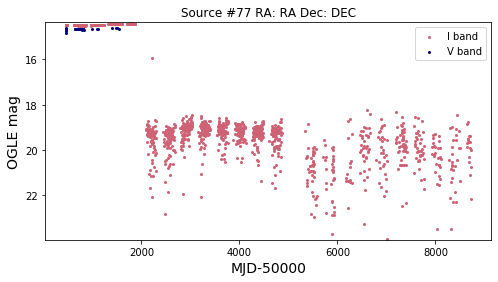

In [46]:
iband,vband = o.getIV(77,cross2,stack=True,plot=True,mlist=['OII I','OIII I','OIV I'])

In [47]:
o.splinedetrend(iband,window=300)

In [49]:
iband = iband[350:]

(19.5, 17)

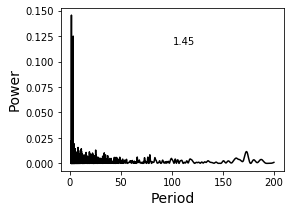

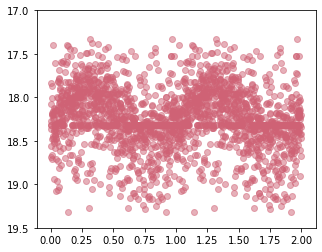

In [52]:
bp = o.periodogram(iband,minp=1,maxp=200,plot=True,det=True)
plt.figure(figsize=(5,4))
plt.scatter((iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
plt.scatter(1+(iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
plt.ylim(19.5,17)

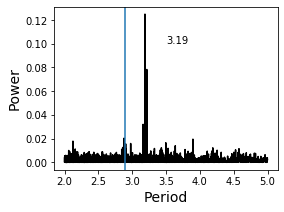

In [66]:
bp = o.periodogram(iband,minp=2,maxp=5,plot=True,det=True)
plt.axvline(1.45*2)

(19.5, 17)

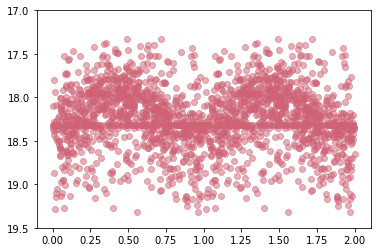

In [68]:
#3.19 days
plt.scatter((iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
plt.scatter(1+(iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
plt.ylim(19.5,17)

# 96

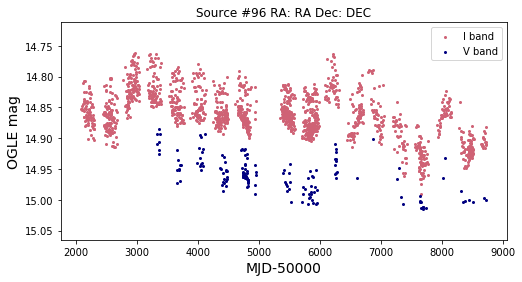

In [75]:
iband,vband = o.getIV(96,cross2,stack=True,plot=True,mlist=['OII I','OIII I','OIV I'])

(14.93, 14.76)

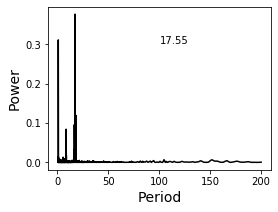

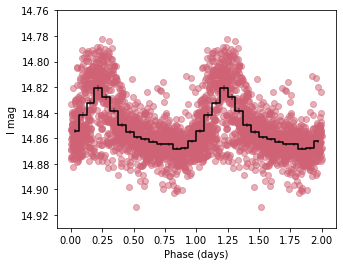

In [85]:
o.splinedetrend(iband,window=300)
bp = o.periodogram(iband,minp=1,maxp=200,plot=True,det=True)
plt.figure(figsize=(5,4))
plt.scatter((iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
plt.scatter(1+(iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
o.phasestep(iband,bp,16,divide=True,double=True,err=True,sterr=True,det=True)
plt.ylim(14.93,14.76)

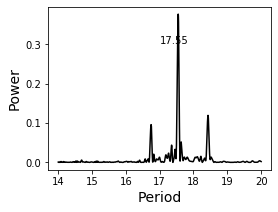

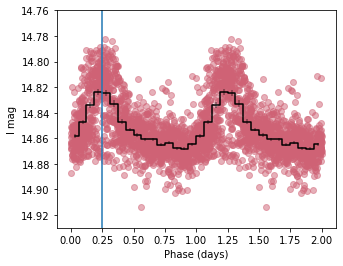

In [89]:
o.splinedetrend(iband,window=300)
bp = o.periodogram(iband,minp=14,maxp=20,plot=True,det=True)
plt.figure(figsize=(5,4))
plt.scatter((iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
plt.scatter(1+(iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
o.phasestep(iband,bp,16,divide=True,double=True,err=True,sterr=True,det=True)
plt.ylim(14.93,14.76)
plt.axvline(0.25)

In [88]:
bp

<Quantity 17.54784176>

In [90]:
find_next(iband,bp,0.25)

phase today: 0.2755457345413402
phase until peak: 0.9744542654586599
days until peak: 17.09956925501903


<Quantity 17.09956926>

# 101

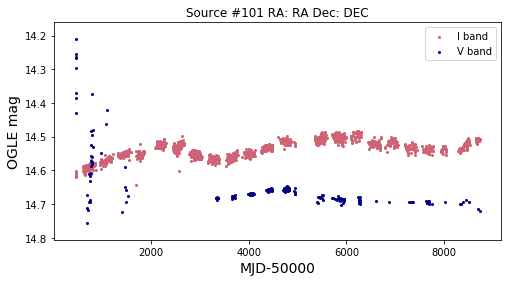

In [97]:
iband,vband = o.getIV(101,cross2,stack=True,plot=True,mlist=['OII I','OIII I','OIV I'])

In [98]:
o.splinedetrend(iband,window=100)

(14.575, 14.5)

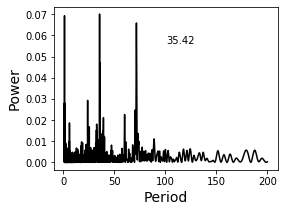

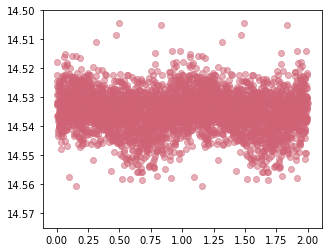

In [102]:
freq,power, bp = o.periodogram(iband,minp=1,maxp=200,plot=True,det=True,more=True)
plt.figure(figsize=(5,4))
plt.scatter((iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
plt.scatter(1+(iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
plt.ylim(14.575,14.5)

In [103]:
o.findpeaks(freq,power,pkorder=True)

,period,power,ind
0,71.583429,0.065868,741
1,35.424239,0.070054,1919
2,1.026163,0.069292,80092
3,1.011364,0.051022,81270


In [105]:
o.aliasarr([1.026163,1.011364])

array([[39.22191645, 88.99718409],
       [ 0.50645629,  0.50282495]])

# 119

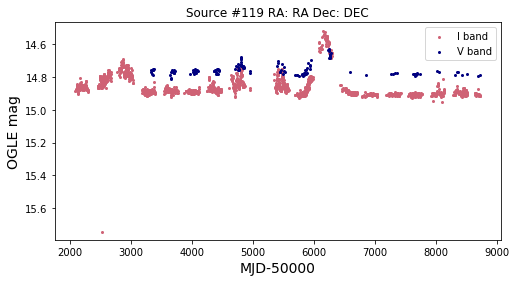

In [107]:
iband,vband = o.getIV(119,cross2,stack=True,plot=True,mlist=['OII I','OIII I','OIV I'])

(15, 14.7)

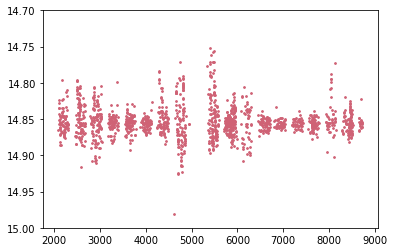

In [110]:
o.splinedetrend(iband,window=300)
plt.scatter(iband['MJD-50000'],iband['I detrend'],color=pink,s=3)
plt.ylim(15,14.7)

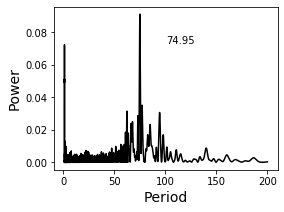

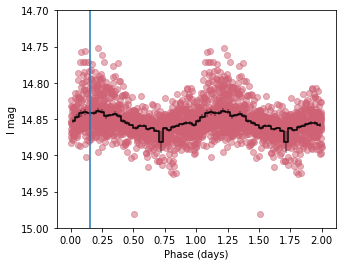

In [128]:
freq,power, bp = o.periodogram(iband,minp=1,maxp=200,plot=True,det=True,more=True)
plt.figure(figsize=(5,4))
plt.scatter((iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
plt.scatter(1+(iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
o.phasestep(iband,bp,30,divide=True,double=True,err=True,sterr=True,det=True)

plt.ylim(15,14.7)
plt.axvline(0.15)

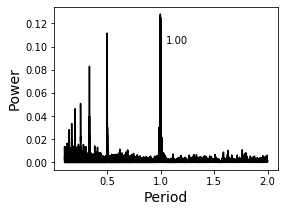

In [126]:
#check alias
freq,power,lowbp = o.periodogram(iband,more=True,minp=0.1,maxp=2)

In [120]:
pf = o.findpeaks(freq,power,pkorder=True)

In [122]:
o.aliasarr(pf['period'])

array([[1.08812425e+03, 3.48967857e+03, 1.66144134e+03, 6.32637561e+02,
        4.07486032e+02, 3.30437429e+02, 2.73317771e+02, 2.35514503e+02,
        9.98182589e-01, 9.97552830e-01, 9.96669510e-01, 9.96086478e-01,
        9.94833032e-01, 9.94267033e-01, 9.93642203e-01, 4.98705136e-01,
        4.98488013e-01, 4.98342123e-01, 3.32430954e-01],
       [5.00229859e-01, 5.00071650e-01, 4.99849574e-01, 4.99605141e-01,
        4.99387234e-01, 4.99244570e-01, 4.99086984e-01, 4.98940743e-01,
        3.33131154e-01, 3.33060981e-01, 3.32962455e-01, 3.32897360e-01,
        3.32757241e-01, 3.32693893e-01, 3.32623905e-01, 2.49675864e-01,
        2.49621431e-01, 2.49584842e-01, 1.99674791e-01]])

In [127]:
find_next(iband,bp,0.15)

phase today: 0.21670281608154737
phase until peak: 0.9332971839184526
days until peak: 69.94992802519633


<Quantity 69.94992803>

# 136

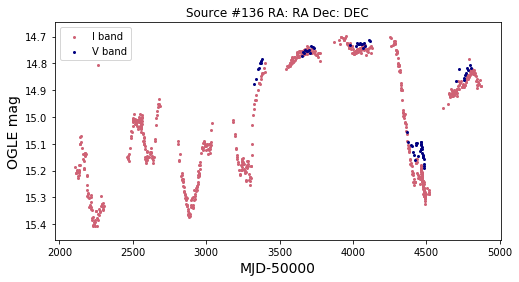

In [136]:
iband,vband = o.getIV(136,cross2,stack=True,plot=True,mlist=['OII I','OIII I','OIV I'])

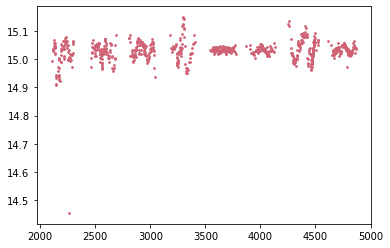

In [137]:
o.splinedetrend(iband,window=300)
plt.scatter(iband['MJD-50000'],iband['I detrend'],color=pink,s=3)

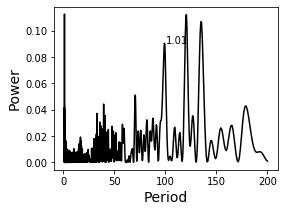

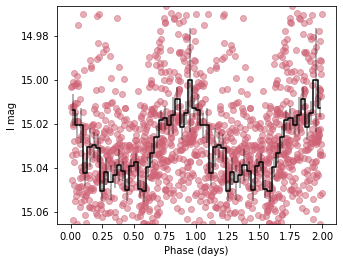

In [138]:
freq,power, bp = o.periodogram(iband,minp=1,maxp=200,plot=True,det=True,more=True)
plt.figure(figsize=(5,4))
plt.scatter((iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
plt.scatter(1+(iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
o.phasestep(iband,bp,30,divide=True,double=True,err=True,sterr=True,det=True)

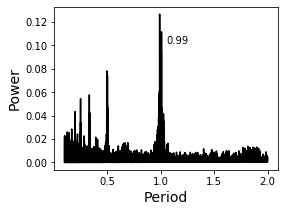

In [139]:
#check for alias
freq,power,lowbp = o.periodogram(iband,minp=0.1,maxp=2,plot=True,det=True,more=True)
pf = o.findpeaks(freq,power,pkorder=True)

In [140]:
o.aliasarr(pf['period'])

array([[135.97566896, 179.1507998 , 120.37052066,  98.85115284,
         75.81079002,   1.00464999,   0.98908693,   0.98732081,
          0.98436789,   0.49605799,   0.33242049],
       [  0.50184535,   0.50139938,   0.49793167,   0.49748367,
          0.49672392,   0.3338484 ,   0.33211188,   0.33191253,
          0.33157814,   0.2490106 ,   0.19967102]])

# 141

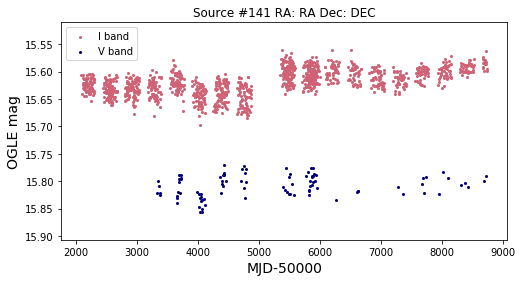

In [129]:
iband,vband = o.getIV(141,cross2,stack=True,plot=True,mlist=['OII I','OIII I','OIV I'])

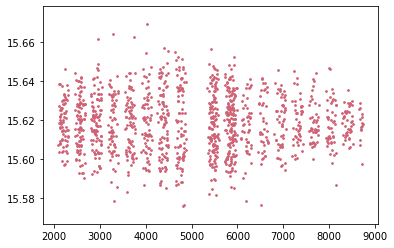

In [130]:
o.splinedetrend(iband,window=300)
plt.scatter(iband['MJD-50000'],iband['I detrend'],color=pink,s=3)
# plt.ylim(15,14.7)

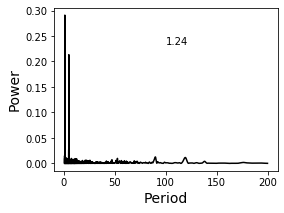

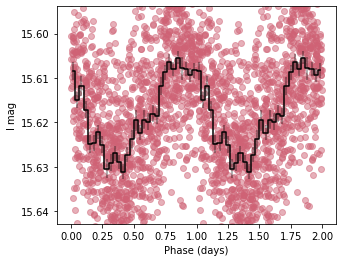

In [131]:
freq,power, bp = o.periodogram(iband,minp=1,maxp=200,plot=True,det=True,more=True)
plt.figure(figsize=(5,4))
plt.scatter((iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
plt.scatter(1+(iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
o.phasestep(iband,bp,30,divide=True,double=True,err=True,sterr=True,det=True)

# plt.ylim(15,14.7)
# plt.axvline(0.15)

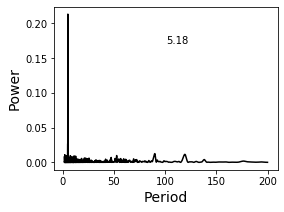

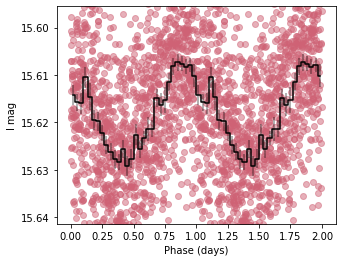

In [132]:
freq,power, bp = o.periodogram(iband,minp=2,maxp=200,plot=True,det=True,more=True)
plt.figure(figsize=(5,4))
plt.scatter((iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
plt.scatter(1+(iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
o.phasestep(iband,bp,30,divide=True,double=True,err=True,sterr=True,det=True)

5.18 likely alias of 1.24 days

In [71]:
phase = pd.read_csv('phasetab.csv')

In [72]:
phase.columns

Index(['src_n', 'period', 'amp', 'phase diff', 'phase max', 'phase min',
       'shape', 'diff mean', 'mean', 'skew', 'kurtosis', 'symm sum',
       'mean err'],
      dtype='object')

(0, 0.1)

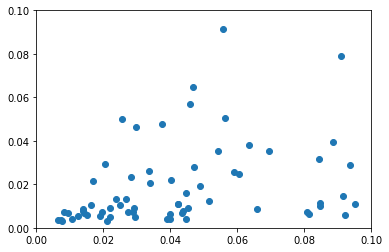

In [74]:
plt.scatter(summ['stdev I'],phase['amp'])
plt.xlim(0,.1)
plt.ylim(0,.1)